## SHAPのサンプルコード

In [1]:
%load_ext lab_black

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

%matplotlib inline

# データセットの読込み
boston = load_boston()

# データフレームの作成
# 説明変数の格納
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# 目的変数の追加
df["MEDV"] = boston.target

# データの中身を確認
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 決定木の作成~可視化

5.56
6.26


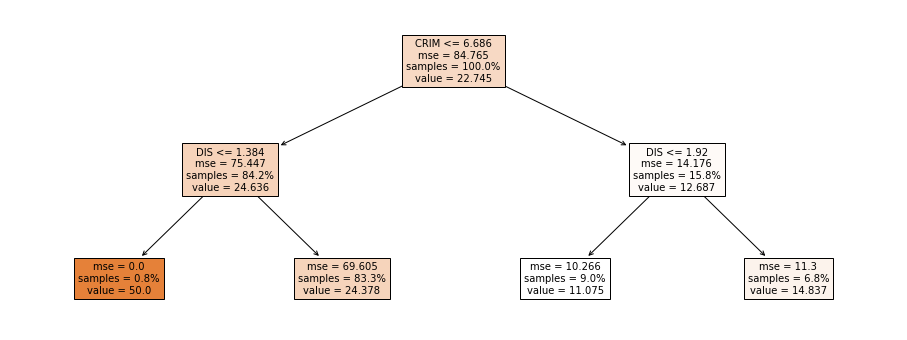

In [3]:
# 決定木をシンプルな構成にするため、変数を絞る
X = df.loc[:, ["CRIM", "DIS"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, df.iloc[:, 13], test_size=0.3, random_state=0
)

# create model
model = DecisionTreeRegressor(max_depth=2)  # シンプルな木にするため2階層に指定
model.fit(X_train, y_train)

print(mean_absolute_error(y_train, model.predict(X_train)).round(2))
print(mean_absolute_error(y_test, model.predict(X_test)).round(2))

plt.figure(figsize=(16, 6))
plot_tree(
    model, feature_names=X.columns, filled=True, proportion=True, fontsize=10
)
plt.show()

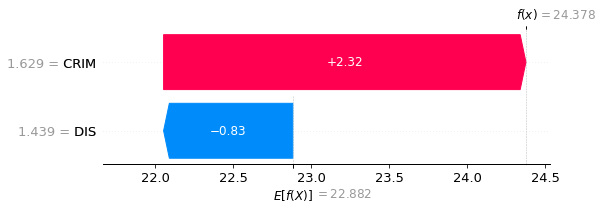

In [4]:
# SHAP値
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_train)
shap.plots.waterfall(shap_values[0])

#

In [5]:
# 学習データと評価データを作成
x_train, x_test, y_train, y_test = train_test_split(
    df.iloc[:, 0:13], df.iloc[:, 13], test_size=0.2, random_state=1
)

# モデルの学習
RF = RandomForestRegressor()
RF.fit(x_train, y_train)

RandomForestRegressor()

In [6]:
explainer = shap.TreeExplainer(RF)

In [7]:
shap_values = explainer(x_train)  # shap._explanation.Explanation型の場合
shap_values_ar = explainer.shap_values(x_train)  # numpy.ndarray型の場合
print("shap_values: ", type(shap_values))
print("shap_values_ar: ", type(shap_values_ar))

shap_values:  <class 'shap._explanation.Explanation'>
shap_values_ar:  <class 'numpy.ndarray'>


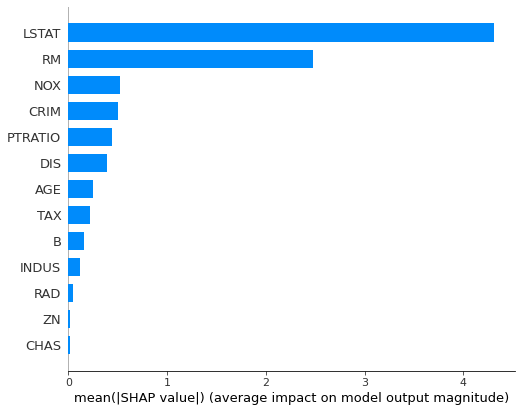

In [8]:
shap.summary_plot(shap_values_ar, x_train, plot_type="bar")

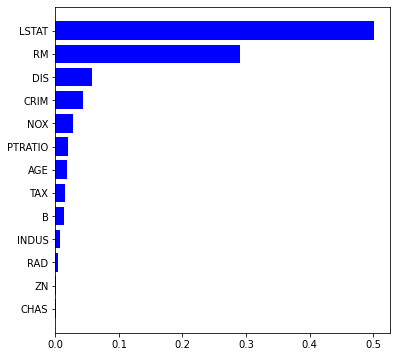

In [9]:
features = df.columns
importances = RF.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(6, 6))
plt.barh(range(len(indices)), importances[indices], color="b", align="center")
plt.yticks(range(len(indices)), features[indices])
plt.show()

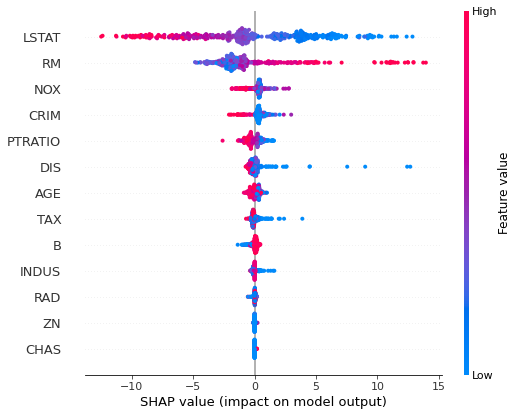

In [10]:
shap.summary_plot(shap_values_ar, x_train)

In [11]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values_ar,
    features=x_train,
)

In [12]:
shap.initjs()
shap.force_plot(
    explainer.expected_value, shap_values_ar[0, :], x_train.iloc[0, :]
)